<a href="https://colab.research.google.com/github/Judy-Choi/Tensorflow_Certificate/blob/main/2_(HW)_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal Metric:
- val_loss : 0.07126
- val_acc : 0.9804

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

## 1. dataset 준비하기 (Train / Test) 

## Load dataset

In [ ]:
mnist = tf.keras.datasets.mnist

## 2. data preprocessing

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

## 3. 샘플 데이터 Visualization

In [ ]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

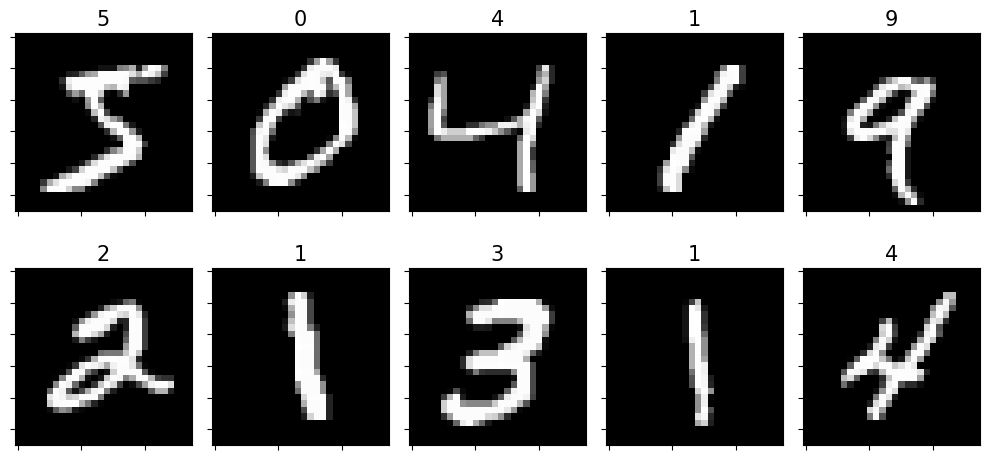

In [ ]:
# 시각화
fig, axes = plt.subplots(2, 5)
fig.set_size_inches(10, 5)

for i in range(10):
    axes[i//5, i%5].imshow(x_train[i], cmap='gray')
    axes[i//5, i%5].set_title(str(y_train[i]), fontsize=15)
    plt.setp( axes[i//5, i%5].get_xticklabels(), visible=False)
    plt.setp( axes[i//5, i%5].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

## 4. 모델 설계하기

In [ ]:
model = Sequential([
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

### Model optimizer, loss

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
checkpoint_path = "my_checkpoint.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

## 5. 모델 학습하기

In [ ]:
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=100,
                    callbacks=[checkpoint, early_stopping],
                   )

Epoch 1/100
1872/1875 [============================>.] - ETA: 0s - loss: 0.0507 - acc: 0.9842
Epoch 1: val_loss did not improve from 0.05532
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0508 - acc: 0.9842 - val_loss: 0.0629 - val_acc: 0.9848
Epoch 2/100
1865/1875 [============================>.] - ETA: 0s - loss: 0.0503 - acc: 0.9852
Epoch 2: val_loss improved from 0.05532 to 0.05438, saving model to my_checkpoint.ckpt
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0502 - acc: 0.9852 - val_loss: 0.0544 - val_acc: 0.9860
Epoch 3/100
1864/1875 [============================>.] - ETA: 0s - loss: 0.0459 - acc: 0.9855
Epoch 3: val_loss did not improve from 0.05438
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0460 - acc: 0.9855 - val_loss: 0.0620 - val_acc: 0.9836
Epoch 4/100
1875/1875 [==============================] - ETA: 0s - loss: 0.0439 - acc: 0.9871
Epoch 4: val_loss did not improve from 0.05438
1875/1875 [================

## 6. Evaluation (callbacks=[ModelCheckpoint])

In [ ]:
# checkpoint 를 저장한 파일명을 입력합니다.
model.load_weights(checkpoint_path)
# 모델의 구조와 파라미터를 출력합니다.
model.summary()
model.evaluate(x_test, y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization (BatchN  (None, 256)              1

[0.05332822725176811, 0.9860000014305115]

## 7. 모델 검증하기 (시각화)

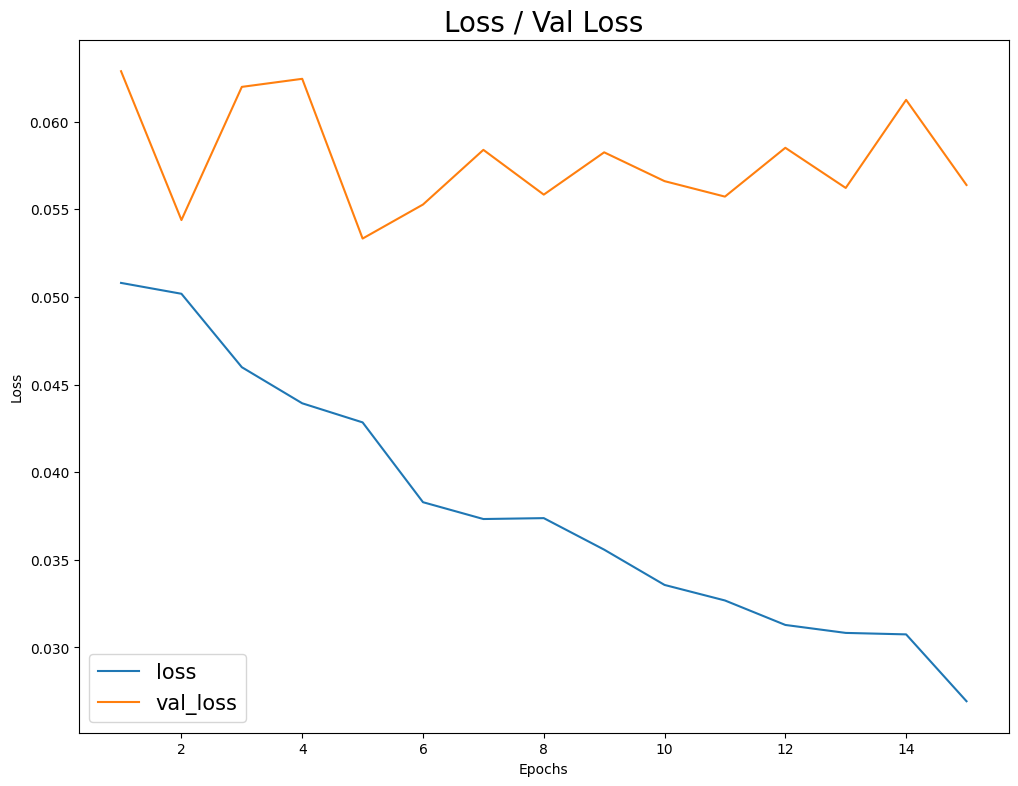

In [ ]:
# plt.figure(figsize=(12, 9))
# plt.plot(np.arange(1, 16), history.history['loss'])
# plt.plot(np.arange(1, 16), history.history['val_loss'])
# plt.title('Loss / Val Loss', fontsize=20)
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend(['loss', 'val_loss'], fontsize=15)
# plt.show()

plt.figure(figsize=(12, 9))
epochs = len(history.history['loss'])  # epochs 값을 가져옴
plt.plot(np.arange(1, epochs+1), history.history['loss'])
plt.plot(np.arange(1, epochs+1), history.history['val_loss'])
plt.title('Loss / Val Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], fontsize=15)
plt.show()


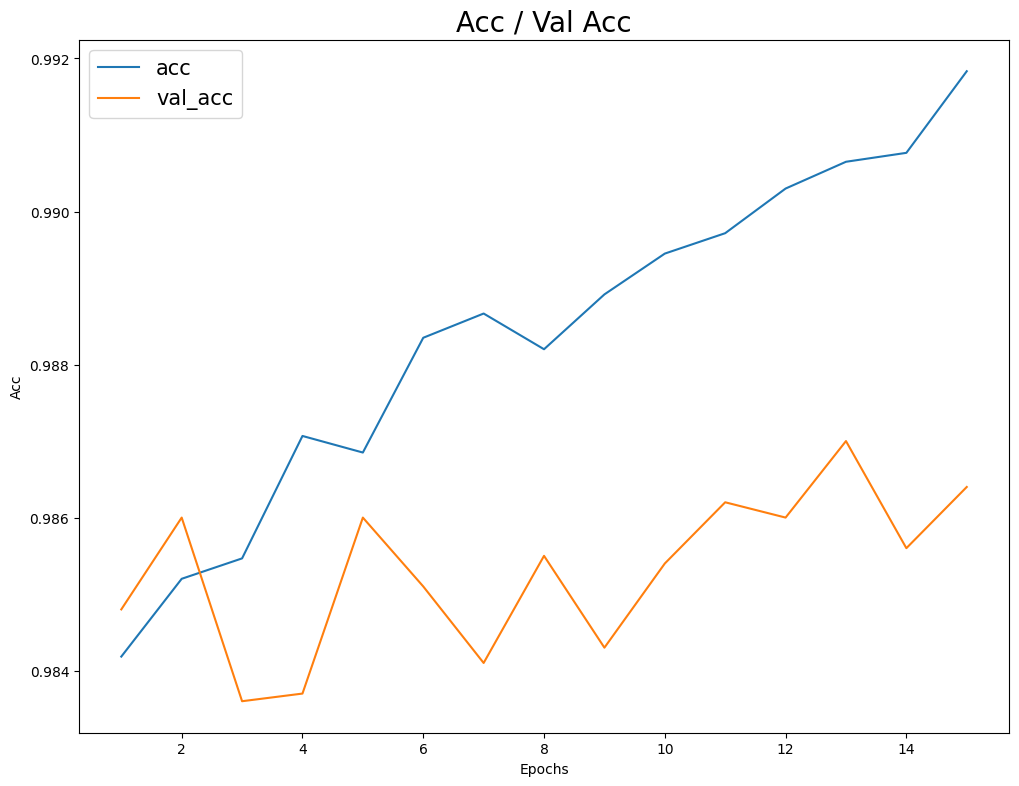

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, epochs+1), history.history['acc'])
plt.plot(np.arange(1, epochs+1), history.history['val_acc'])
plt.title('Acc / Val Acc', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'], fontsize=15)
plt.show()

## CNN을 사용해서 같은 문제 학습해보기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28,28,1)
x_test = x_test.reshape(10000, 28,28,1)
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
model = Sequential([
    Conv2D(64, (3,3),input_shape=(28,28,1), activation='relu' ),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3),  activation='relu' ),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    BatchNormalization(), 
    Dense(10, activation='softmax')
])
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
checkpoint_path = "checkpoint.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
    save_weights_only=True, 
    save_best_only=True, 
    monitor='val_loss', 
    verbose=1)
history = model.fit(x_train, y_train, 
    validation_data=(x_test, y_test),
    verbose=1,
    epochs=50,
    callbacks=[checkpoint, early_stopping]                
)
model.summary()
model.load_weights(checkpoint_path)
model.save("mymodel.h5")

Epoch 1/50
1874/1875 [============================>.] - ETA: 0s - loss: 0.2374 - acc: 0.9333
Epoch 1: val_loss improved from inf to 0.03936, saving model to checkpoint.ckpt
1875/1875 [==============================] - 16s 5ms/step - loss: 0.2374 - acc: 0.9333 - val_loss: 0.0394 - val_acc: 0.9870
Epoch 2/50
1862/1875 [============================>.] - ETA: 0s - loss: 0.0837 - acc: 0.9758
Epoch 2: val_loss improved from 0.03936 to 0.03765, saving model to checkpoint.ckpt
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0834 - acc: 0.9759 - val_loss: 0.0377 - val_acc: 0.9885
Epoch 3/50
1874/1875 [============================>.] - ETA: 0s - loss: 0.0663 - acc: 0.9810
Epoch 3: val_loss improved from 0.03765 to 0.02936, saving model to checkpoint.ckpt
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0663 - acc: 0.9810 - val_loss: 0.0294 - val_acc: 0.9905
Epoch 4/50
1867/1875 [============================>.] - ETA: 0s - loss: 0.0537 - acc: 0.9843
Epoch 4: v

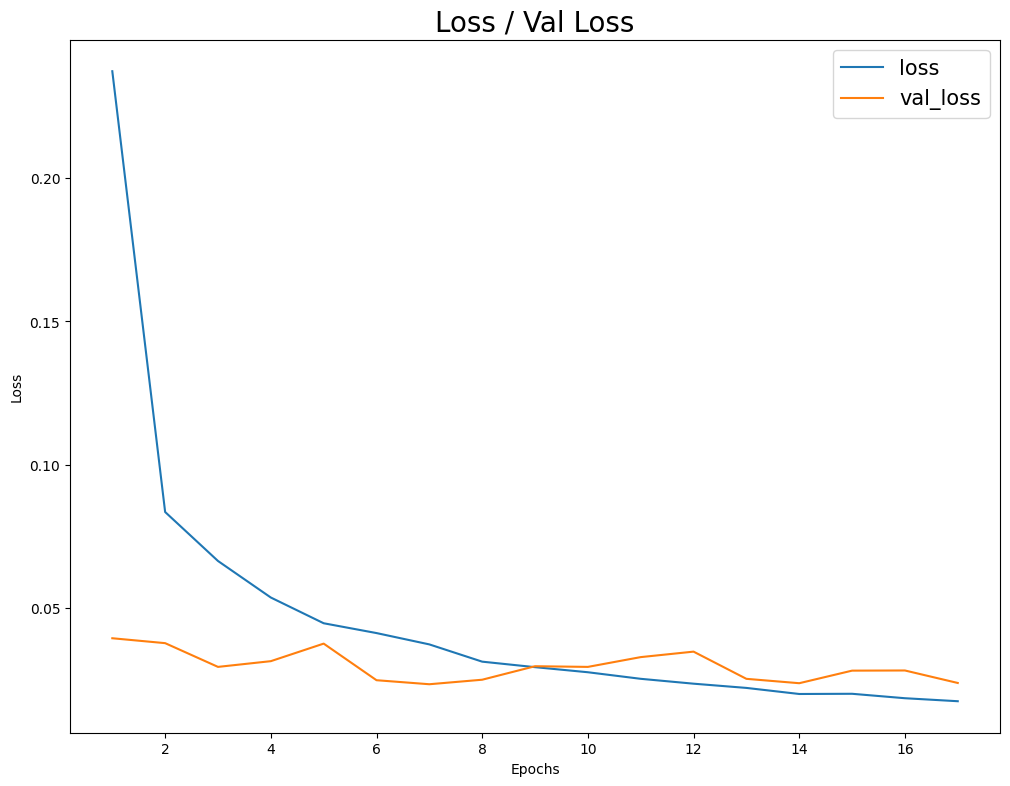

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 18), history.history['loss'])
plt.plot(np.arange(1, 18), history.history['val_loss'])
plt.title('Loss / Val Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], fontsize=15)
plt.show()

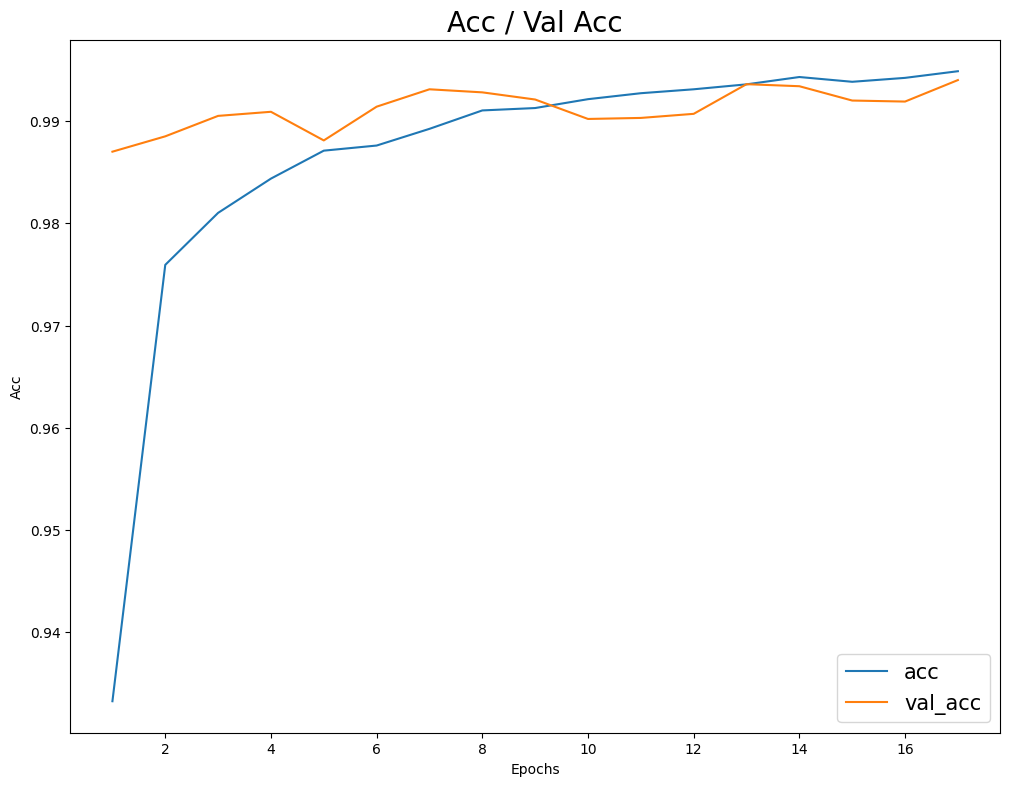

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 18), history.history['acc'])
plt.plot(np.arange(1, 18), history.history['val_acc'])
plt.title('Acc / Val Acc', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'], fontsize=15)
plt.show()

In [ ]:
print(type(history.history))
print(history.history)
print(len(history.history))
print(history.history['acc'])
print(history.history['val_acc'])
print(history.history['loss'])
print(history.history['val_loss'])

<class 'dict'>
{'loss': [0.2373596727848053, 0.08344528079032898, 0.06634306162595749, 0.05358314886689186, 0.04459964111447334, 0.04117118567228317, 0.03721335902810097, 0.031188463792204857, 0.02926676720380783, 0.027491575106978416, 0.02519867569208145, 0.023497238755226135, 0.02202017419040203, 0.019899433478713036, 0.019970253109931946, 0.018420599400997162, 0.01737360469996929], 'acc': [0.9332666397094727, 0.975933313369751, 0.9810166954994202, 0.9843666553497314, 0.9871000051498413, 0.9876000285148621, 0.9892333149909973, 0.9910333156585693, 0.991266667842865, 0.9921333193778992, 0.9927166700363159, 0.9930999875068665, 0.9935833215713501, 0.9943000078201294, 0.9938333630561829, 0.9942166805267334, 0.994866669178009], 'val_loss': [0.03936252370476723, 0.03765195235610008, 0.029361462220549583, 0.03136032819747925, 0.03748902678489685, 0.024708449840545654, 0.02330411784350872, 0.024880966171622276, 0.029594607651233673, 0.029359349980950356, 0.032775960862636566, 0.03468969836831

# Homework 1 : Dense Layer

## 직접 코딩
기존 모델에서 learning rate를 변경해보겠습니다.

In [ ]:
checkpoint_path = "my_checkpoint.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model = Sequential([
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

opt = tf.keras.optimizers.Adam(lr=0.001)

model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=100,
                    callbacks=[checkpoint, early_stopping],
                   )

# checkpoint 를 저장한 파일명을 입력합니다.
model.load_weights(checkpoint_path)
# 모델의 구조와 파라미터를 출력합니다.
model.summary()
model.evaluate(x_test, y_test)

Epoch 1/100
1866/1875 [============================>.] - ETA: 0s - loss: 0.4095 - acc: 0.8738
Epoch 1: val_loss improved from inf to 0.13900, saving model to my_checkpoint.ckpt
1875/1875 [==============================] - 12s 5ms/step - loss: 0.4087 - acc: 0.8741 - val_loss: 0.1390 - val_acc: 0.9576
Epoch 2/100
1874/1875 [============================>.] - ETA: 0s - loss: 0.1958 - acc: 0.9424
Epoch 2: val_loss improved from 0.13900 to 0.10015, saving model to my_checkpoint.ckpt
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1958 - acc: 0.9424 - val_loss: 0.1001 - val_acc: 0.9708
Epoch 3/100
1870/1875 [============================>.] - ETA: 0s - loss: 0.1562 - acc: 0.9535
Epoch 3: val_loss improved from 0.10015 to 0.09077, saving model to my_checkpoint.ckpt
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1563 - acc: 0.9535 - val_loss: 0.0908 - val_acc: 0.9731
Epoch 4/100
1869/1875 [============================>.] - ETA: 0s - loss: 0.1304 - acc: 0.96

[0.05243439972400665, 0.986299991607666]

## ChatGPT
큰 성능 개선을 보이지 않음.
최소한의 모델 구조만 구현해서인 것 같음.

In [ ]:
import tensorflow as tf
from tensorflow import keras

# MNIST 데이터셋 로드
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 전처리
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# 모델 구성
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])


# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_test, y_test))

# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)


Epoch 1/10
1875/1875 [==============================] - 23s 4ms/step - loss: 0.3063 - accuracy: 0.9065 - val_loss: 0.1223 - val_accuracy: 0.9615
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1767 - accuracy: 0.9464 - val_loss: 0.1026 - val_accuracy: 0.9678
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1417 - accuracy: 0.9560 - val_loss: 0.0812 - val_accuracy: 0.9737
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1255 - accuracy: 0.9619 - val_loss: 0.0862 - val_accuracy: 0.9723
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1140 - accuracy: 0.9650 - val_loss: 0.0735 - val_accuracy: 0.9779
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1034 - accuracy: 0.9672 - val_loss: 0.0737 - val_accuracy: 0.9768
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0967 - accuracy: 0.9693 - val_loss: 0.0627 - val_accurac

# Homework 2 : CNN

## 직접 코딩

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

checkpoint_path = "checkpoint.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
    save_weights_only=True, 
    save_best_only=True, 
    monitor='val_loss', 
    verbose=1)

model = Sequential([
    Conv2D(64, (3,3),input_shape=(28,28,1), activation='relu' ),
    MaxPooling2D(2,2),
    # CNN + MP 한 층 더 쌓기
    Conv2D(64, (3,3),input_shape=(28,28,1), activation='relu' ),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3),  activation='relu' ),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    # Dense 한 층 더 쌓기
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    BatchNormalization(), 
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])


history = model.fit(x_train, y_train, 
    validation_data=(x_test, y_test),
    verbose=1,
    epochs=50,
    callbacks=[checkpoint, early_stopping]                
)
model.summary()
model.load_weights(checkpoint_path)
model.save("mymodel.h5")

Epoch 1/50
1867/1875 [============================>.] - ETA: 0s - loss: 0.5147 - acc: 0.8445
Epoch 1: val_loss improved from inf to 0.09970, saving model to checkpoint.ckpt
1875/1875 [==============================] - 13s 6ms/step - loss: 0.5134 - acc: 0.8450 - val_loss: 0.0997 - val_acc: 0.9722
Epoch 2/50
1869/1875 [============================>.] - ETA: 0s - loss: 0.1655 - acc: 0.9586
Epoch 2: val_loss improved from 0.09970 to 0.07476, saving model to checkpoint.ckpt
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1652 - acc: 0.9587 - val_loss: 0.0748 - val_acc: 0.9797
Epoch 3/50
1870/1875 [============================>.] - ETA: 0s - loss: 0.1242 - acc: 0.9699
Epoch 3: val_loss did not improve from 0.07476
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1241 - acc: 0.9700 - val_loss: 0.0799 - val_acc: 0.9779
Epoch 4/50
1874/1875 [============================>.] - ETA: 0s - loss: 0.1056 - acc: 0.9747
Epoch 4: val_loss improved from 0.07476 to 0.07

## ChatGPT

tensorflow 와 CNN 을 이용해서 MNIST 분류 코드를 작성해 줘

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 입력 데이터의 형태 변환
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

# 입력 데이터를 0~1 사이 값으로 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

# 모델 구성
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))

# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)


Epoch 1/50
938/938 [==============================] - 7s 5ms/step - loss: 0.3034 - accuracy: 0.9057 - val_loss: 0.0542 - val_accuracy: 0.9833
Epoch 2/50
938/938 [==============================] - 4s 5ms/step - loss: 0.0939 - accuracy: 0.9733 - val_loss: 0.0376 - val_accuracy: 0.9877
Epoch 3/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0694 - accuracy: 0.9809 - val_loss: 0.0333 - val_accuracy: 0.9892
Epoch 4/50
938/938 [==============================] - 5s 5ms/step - loss: 0.0545 - accuracy: 0.9849 - val_loss: 0.0292 - val_accuracy: 0.9904
Epoch 5/50
938/938 [==============================] - 4s 5ms/step - loss: 0.0443 - accuracy: 0.9871 - val_loss: 0.0270 - val_accuracy: 0.9933
Epoch 6/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0381 - accuracy: 0.9888 - val_loss: 0.0327 - val_accuracy: 0.9913
Epoch 7/50
938/938 [==============================] - 5s 6ms/step - loss: 0.0345 - accuracy: 0.9899 - val_loss: 0.0314 - val_accuracy: 0.9915
Epoch 

KeyboardInterrupt: ignored

이 코드의 성능을 더 개선해 줄래?

물론입니다! CNN 모델의 성능을 더욱 개선하기 위해 다음과 같은 방법을 시도해 볼 수 있습니다.

레이어 개수를 늘리거나 레이어의 크기를 늘리기
- 레이어의 개수와 크기를 늘리면 모델의 복잡도가 증가하여 더 다양한 패턴을 학습할 수 있습니다.

Dropout 비율 조절
- Dropout 비율을 늘리면 과적합을 방지할 수 있습니다. 하지만 Dropout 비율이 너무 높으면 모델이 제대로 학습되지 않을 수 있습니다. 적절한 비율을 찾아야 합니다.

Batch normalization 적용
- Batch normalization을 사용하면 각 레이어의 입력 데이터를 평균과 분산으로 정규화하여 학습이 잘 되도록 도와줍니다.

Learning rate 조절
- Learning rate는 optimizer가 모델을 학습할 때 사용하는 step size입니다. Learning rate를 적절하게 조절하여 학습이 잘 되도록 해야합니다.

다른 optimizer 사용
- Adam optimizer 외에도 다른 optimizer를 사용하여 모델의 성능을 개선할 수 있습니다.


다음은 위 방법 중 일부를 적용한 CNN 모델의 예시 코드입니다.

ChatGPT 코드에 early stop, best checkpoint 추가

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 입력 데이터의 형태 변환
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

# 입력 데이터를 0~1 사이 값으로 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

# callback 추가
checkpoint_path = "my_checkpoint.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# 모델 구성
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# 모델 컴파일
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test), callbacks=[checkpoint, early_stopping])

# checkpoint 를 저장한 파일명을 입력합니다.
model.load_weights(checkpoint_path)
# 모델의 구조와 파라미터를 출력합니다.
model.summary()
model.evaluate(x_test, y_test)

Epoch 1/50
932/938 [============================>.] - ETA: 0s - loss: 0.1988 - accuracy: 0.9392
Epoch 1: val_loss improved from inf to 0.04749, saving model to my_checkpoint.ckpt
938/938 [==============================] - 12s 8ms/step - loss: 0.1984 - accuracy: 0.9394 - val_loss: 0.0475 - val_accuracy: 0.9847
Epoch 2/50
932/938 [============================>.] - ETA: 0s - loss: 0.0634 - accuracy: 0.9813
Epoch 2: val_loss improved from 0.04749 to 0.02963, saving model to my_checkpoint.ckpt
938/938 [==============================] - 8s 8ms/step - loss: 0.0634 - accuracy: 0.9813 - val_loss: 0.0296 - val_accuracy: 0.9908
Epoch 3/50
937/938 [============================>.] - ETA: 0s - loss: 0.0467 - accuracy: 0.9863
Epoch 3: val_loss improved from 0.02963 to 0.02936, saving model to my_checkpoint.ckpt
938/938 [==============================] - 8s 9ms/step - loss: 0.0467 - accuracy: 0.9863 - val_loss: 0.0294 - val_accuracy: 0.9905
Epoch 4/50
934/938 [============================>.] - ETA: 0s

[0.016355076804757118, 0.9958000183105469]